In [1]:
import pickle as pkl
import pandas as pd

In [2]:
file_path = "results/drugs/None/scores_04031501.pkl"
with open(file_path, "rb") as file:
    results = pkl.load(file=file)
    desc = results[0]
    scores_list = results[1:]
print(desc)

SoftPointWiseKNN


for changing desc if needed

In [3]:
# change_desc = False
# if change_desc:
#     new_desc = f'1/8th data no mask'
#     results[0] = new_desc
#     with open(file_path, "wb") as file:
#         pkl.dump(obj=results, file=file)

In [4]:
for i, scores in enumerate(scores_list):
    print(abs(scores['nona l2 mlp'][0]))

print(i+1, 'splits')

0.02899354137480259
1 splits


In [5]:
scores = {method.split(" mlp")[0]: [abs(scores[method][0]) for scores in scores_list] for method in scores_list[0] if 'knn' not in method}

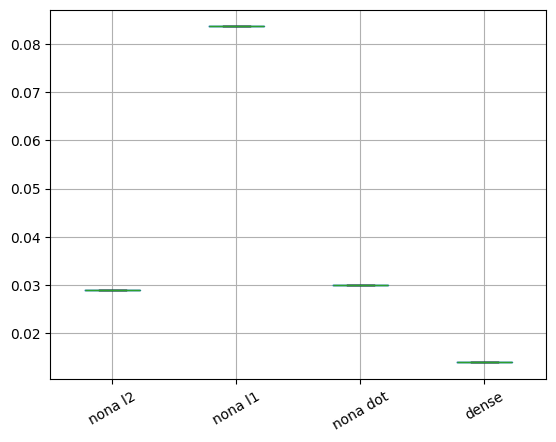

In [6]:
bplot = pd.DataFrame(scores).boxplot(rot=30)
# bplot.set_title('mse on adresso mmse')

In [7]:
pd.DataFrame(scores).median()

nona l2     0.028994
nona l1     0.083628
nona dot    0.030003
dense       0.013960
dtype: float64

In [8]:
times = {method: [scores[method][1] for scores in scores_list] for method in scores_list[0]}

In [9]:
pd.DataFrame(times).median() / 3600

nona l2 mlp           21.117147
nona l2 tuned knn      0.005152
nona l1 mlp           17.214378
nona l1 tuned knn      0.005197
nona dot mlp          11.227890
nona dot tuned knn     0.005106
dense mlp             14.909421
dense tuned knn        0.005083
dtype: float64

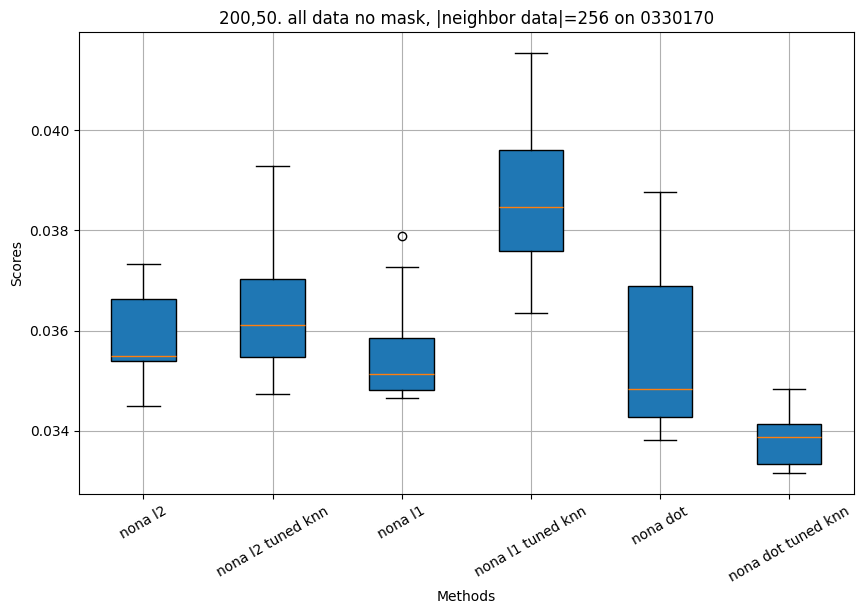

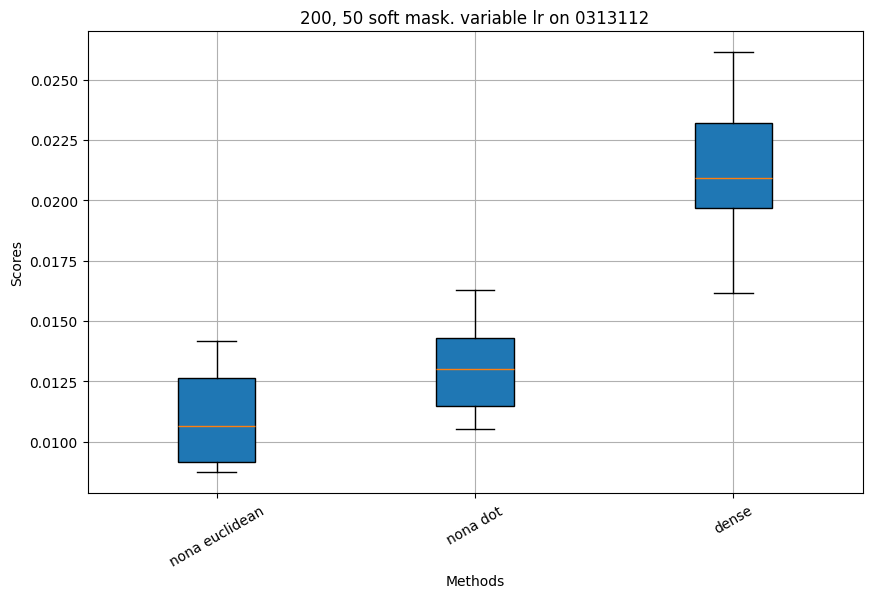

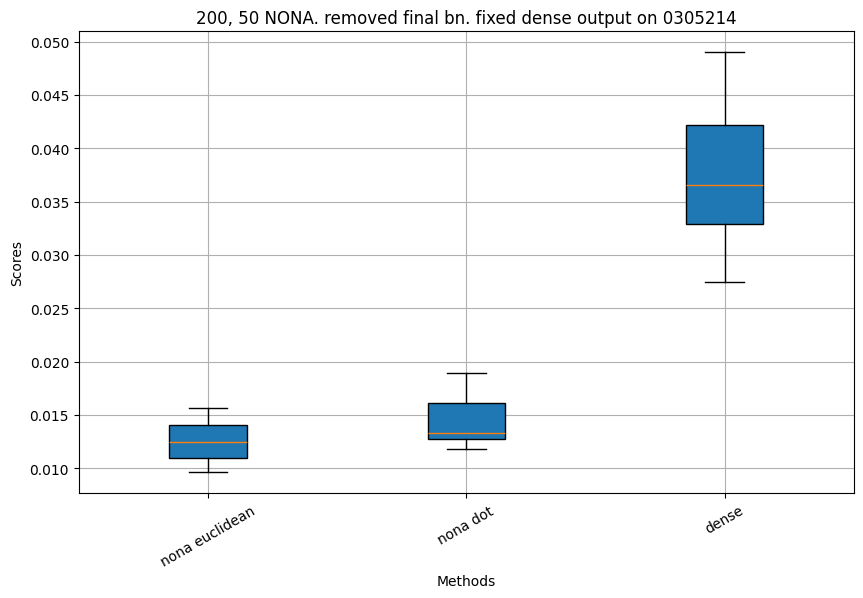

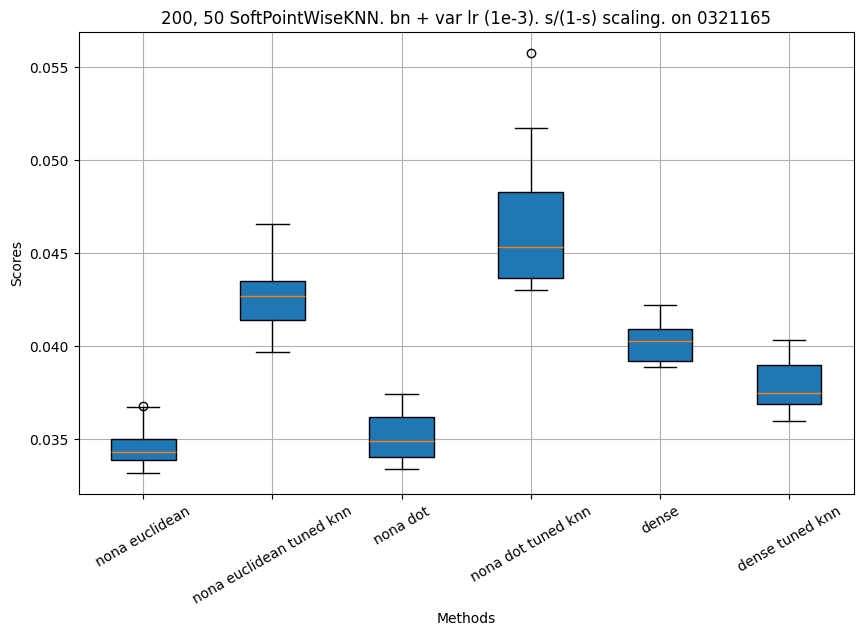

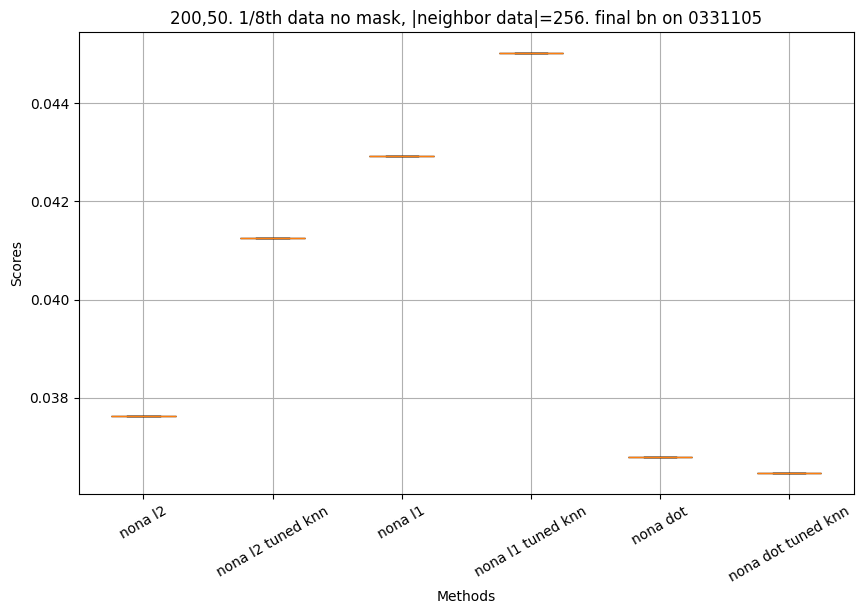

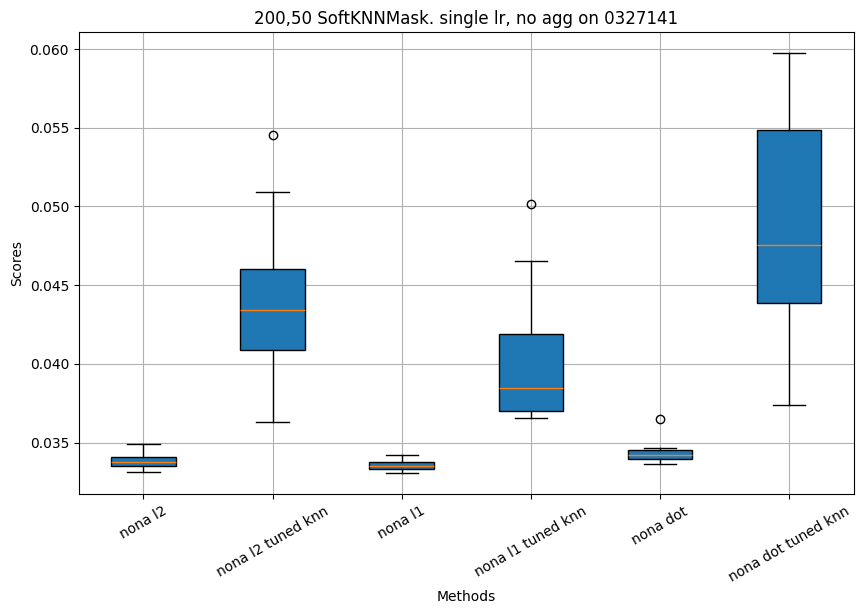

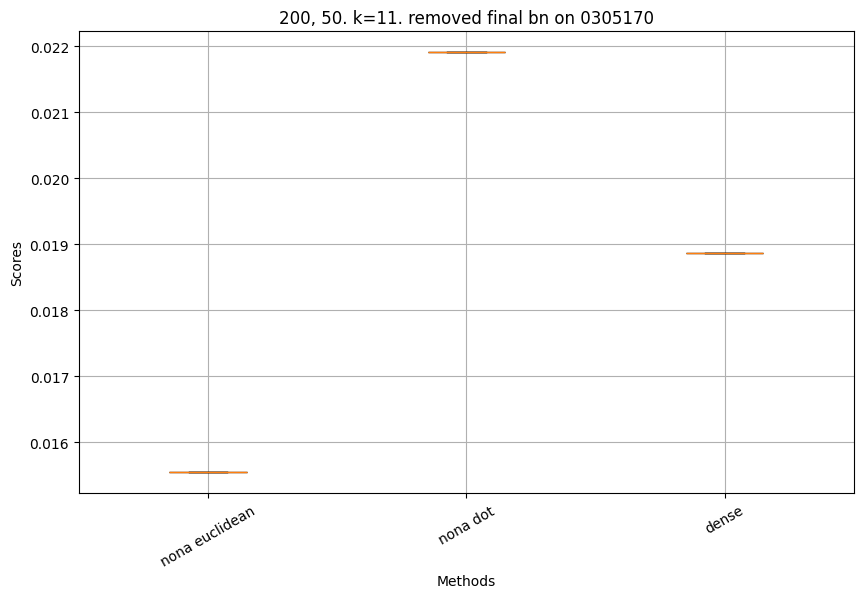

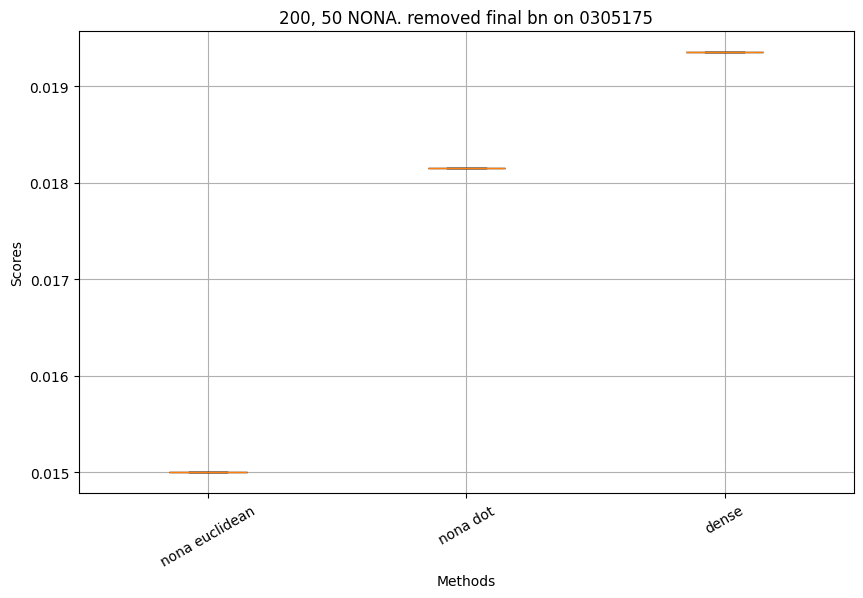

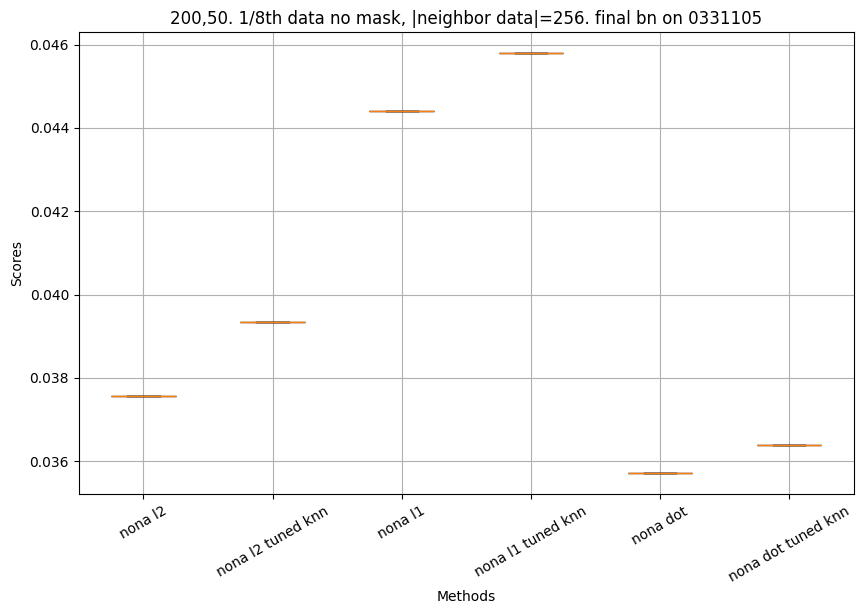

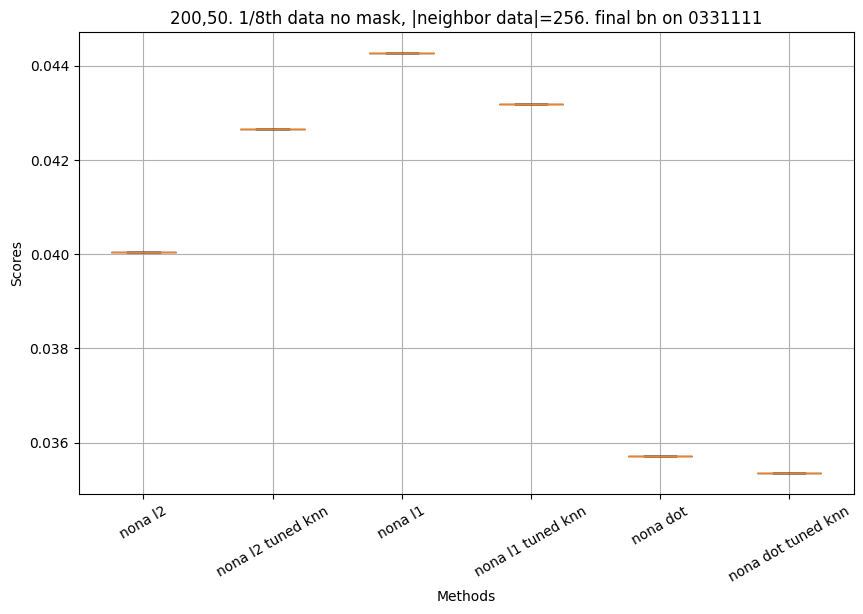

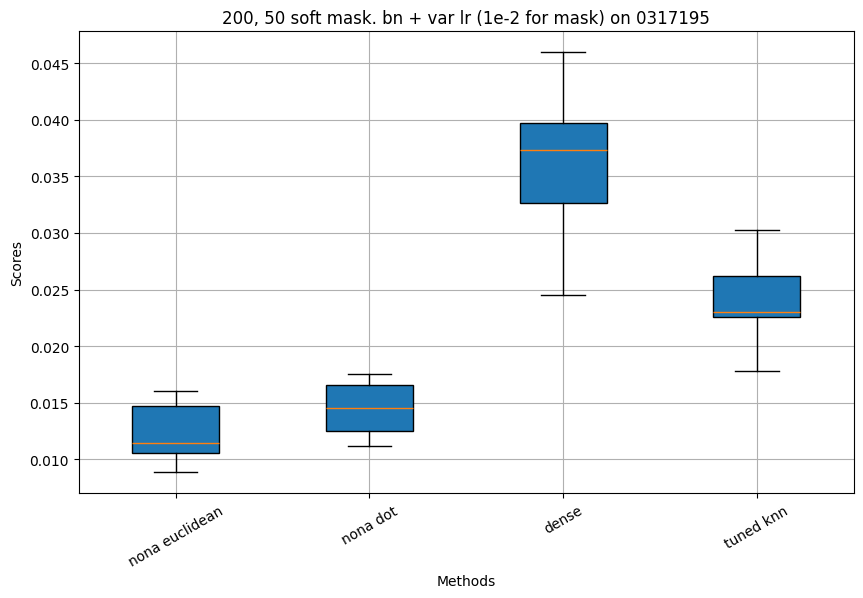

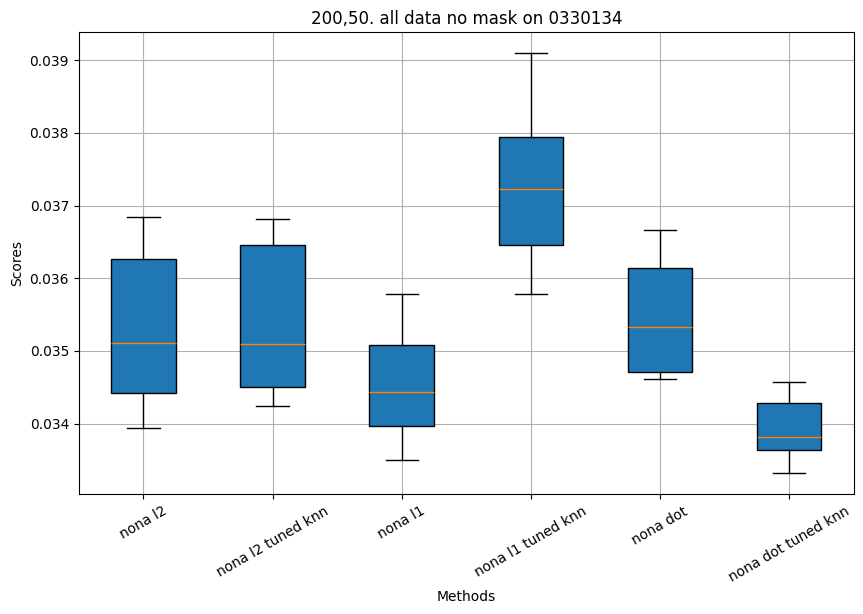

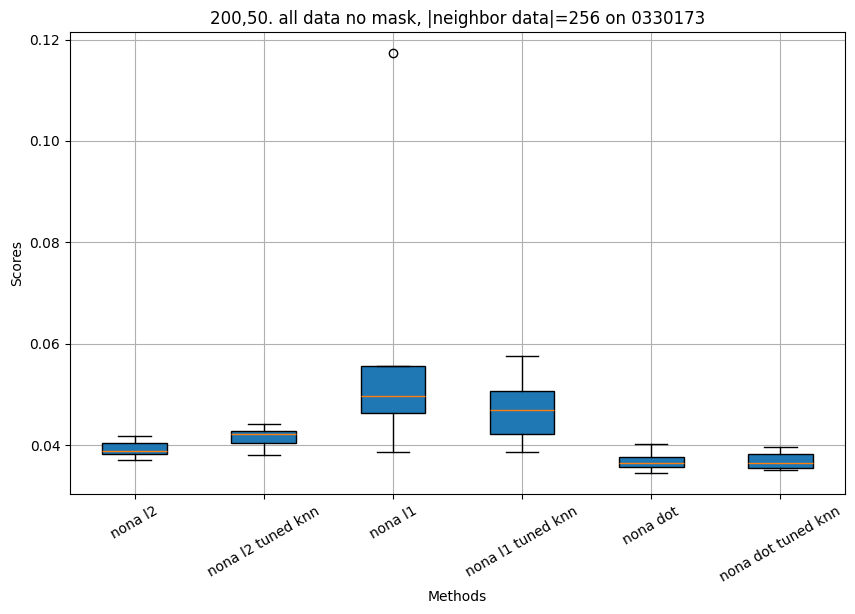

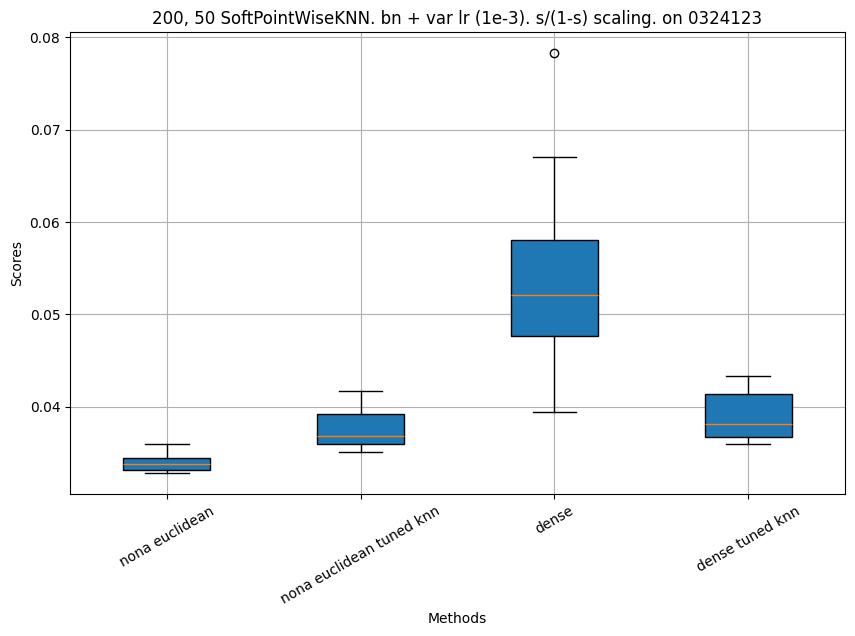

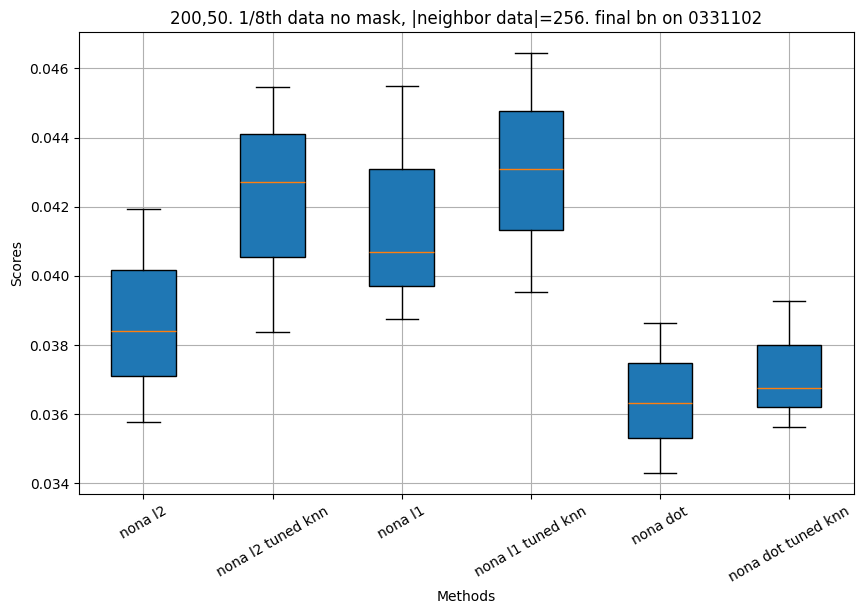

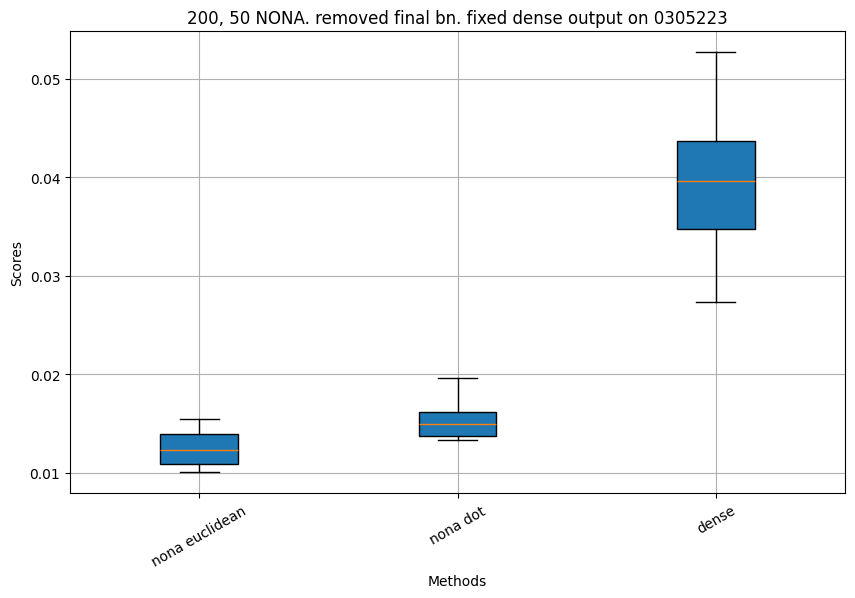

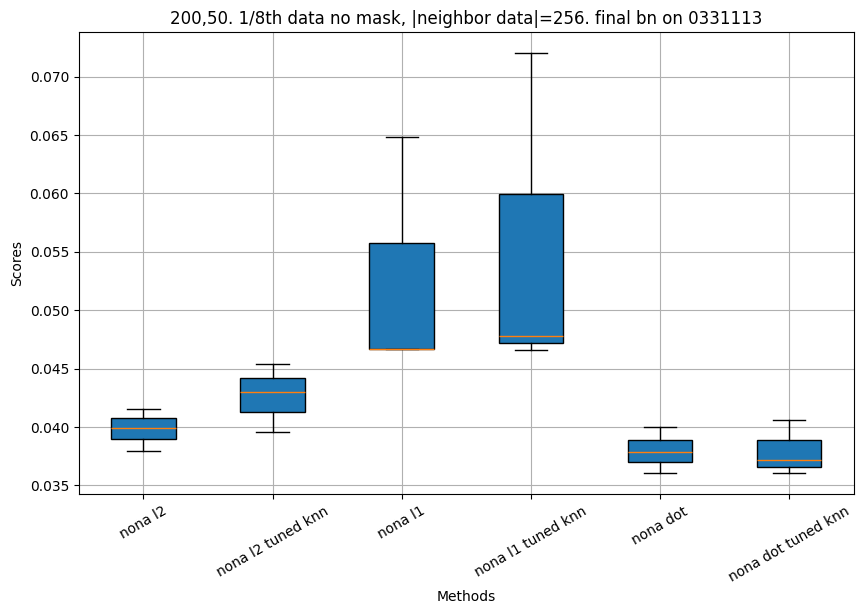

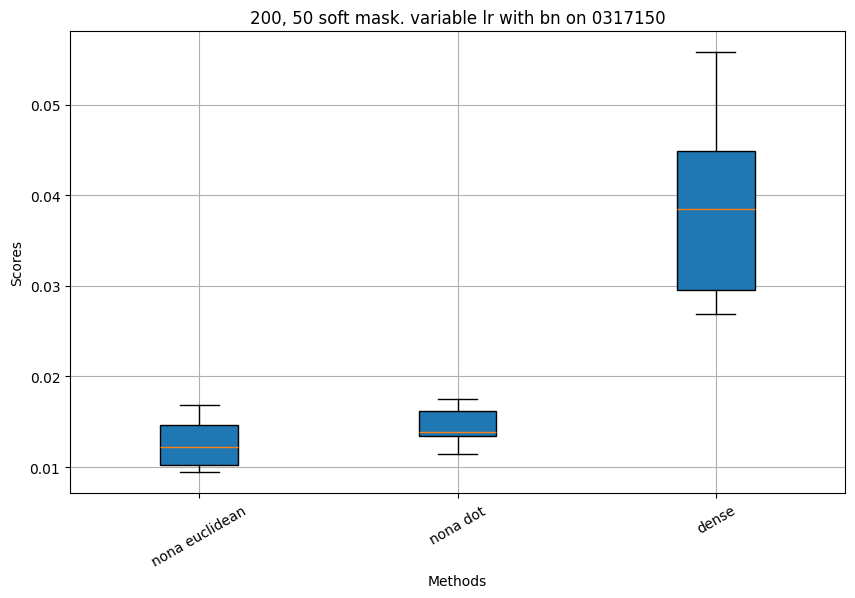

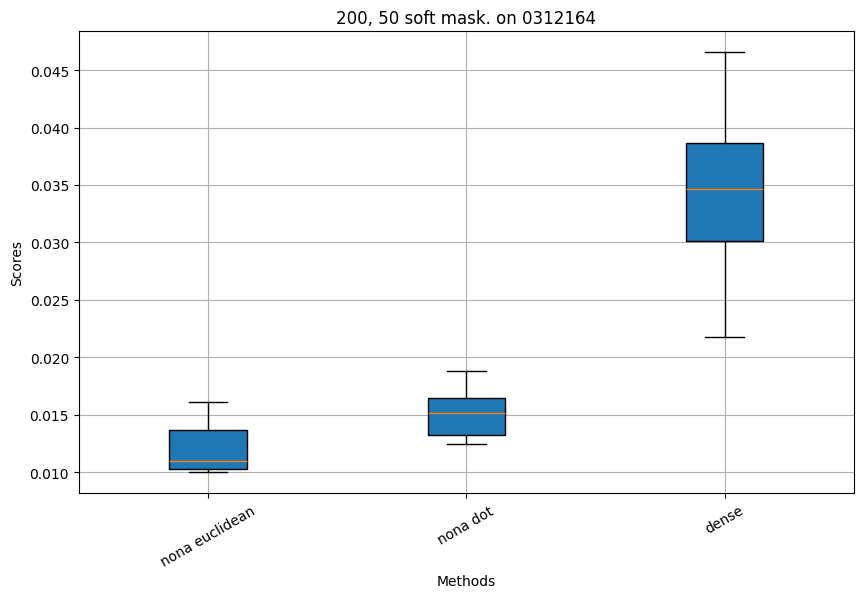

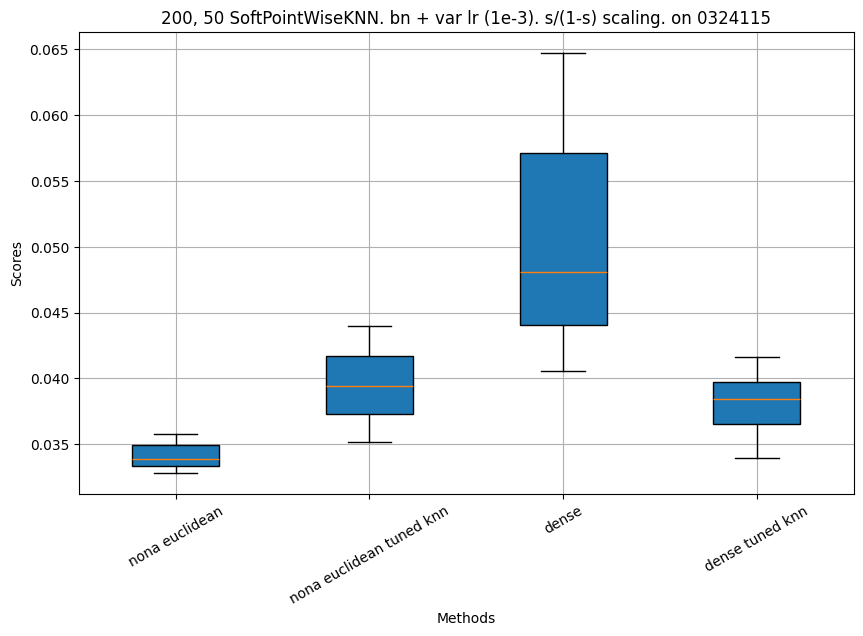

In [1]:
import os
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd

results_dir = "results/rsna"
nona_l2_medians = []
for file_name in os.listdir(results_dir):
    if file_name.endswith(".pkl"):
        file_path = os.path.join(results_dir, file_name)
        date = file_name[7:-5]

        if date[1] == "3": 
            with open(file_path, "rb") as file:
                results = pkl.load(file)
                desc = results[0]
                scores_list = results[1:]
                
                scores = {
                    method.split(" mlp")[0]: [abs(scores[method][0]) for scores in scores_list]
                    for method in scores_list[0]
                }
                
                df = pd.DataFrame(scores)
                if 'nona dot' in df.columns:
                    median_nona_l2 = df['nona dot'].median()
                    nona_l2_medians.append([median_nona_l2, date])

                plt.figure(figsize=(10, 6))
                plt.boxplot(df.values, tick_labels=df.columns, vert=True, patch_artist=True)
                plt.xticks(rotation=30)
                plt.title(f'{desc} on {date}')
                plt.xlabel("Methods")
                plt.ylabel("Scores")
                plt.grid(True)
                plt.show(block=True)

In [ ]:
sorted(nona_l2_medians, key = lambda x: x[0])

[[np.float64(0.42169998586177826), '0320182'],
 [np.float64(0.7111499905586243), '0320133'],
 [np.float64(0.7145000100135803), '0327142'],
 [np.float64(0.7167499959468842), '0327123'],
 [np.float64(0.7222499549388885), '0320120'],
 [np.float64(0.7239999771118164), '0318132'],
 [np.float64(0.7250999808311462), '0318185'],
 [np.float64(0.7452499866485596), '0327124']]

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from similarity_masks import SoftKNNMask, SoftSimMask
from models import NONA_FT
feature_extractor_weights = AutoModel.from_pretrained("distilbert-base-uncased")
sft_weights = torch.load("results/adresso/mmse/models/03171503/nona l2_0.pth", map_location='cpu')
mask = SoftKNNMask()
model = NONA_FT(feature_extractor=feature_extractor_weights, 
                hl_sizes=[200,50], 
                predictor='nona', 
                similarity='l2', 
                mask=mask, 
                dtype=torch.float32
                )
model.load_state_dict(sft_weights)

KeyboardInterrupt: 